# UYG332 - Image Processing Final Project

**Name**: Lucía Nistal Palacios  
**Student ID**: B2481.060130 

This notebook presents the solutions to six image processing problems using Python and OpenCV.  
Each problem uses a specific image and demonstrates the application of some image processing techniques discussed in the course.


Libraries and Setup

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Helper function to display images
def show_image(img, title='', cmap_type='gray'):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 3:
        cmap_type = None
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


##  Problem 1 – `tf2_engineer.jpg`

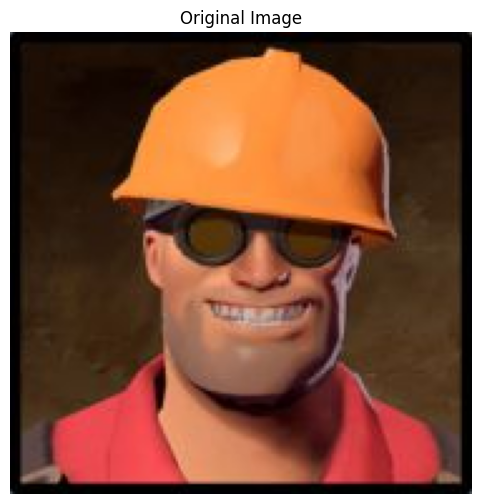

Center coordinates: (92, 92)
Center pixel intensity (BGR): [ 67  92 172]
New intensity at center after patch: [168 158  50]


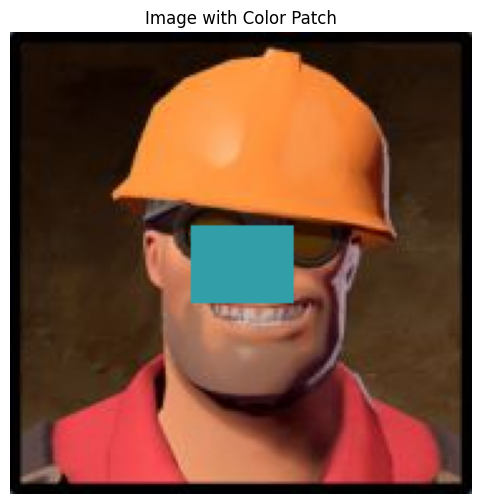

In [2]:
# Step 1: Read and display the original image
img1 = cv2.imread('tf2_engineer.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
show_image(img1_rgb, 'Original Image', cmap_type=None)

# Step 2: Find the center and intensity
h, w, _ = img1.shape
yc, xc = h // 2, w // 2
center_intensity = img1[yc, xc]
print(f"Center coordinates: ({yc}, {xc})")
print(f"Center pixel intensity (BGR): {center_intensity}")

# Step 3: Draw rectangle
patch_color = (0xa8, 0x9e, 0x32)  # BGR
top_left = (xc - 20, yc - 15)
bottom_right = (xc + 20, yc + 15)
cv2.rectangle(img1, top_left, bottom_right, patch_color, -1)

# Step 4: New intensity at center
patch_center_intensity = img1[yc, xc]
print(f"New intensity at center after patch: {patch_center_intensity}")

# Step 5: Display updated image
img1_rgb_updated = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
show_image(img1_rgb_updated, 'Image with Color Patch', cmap_type=None)


##  Problem 2 – `einstein.tif`

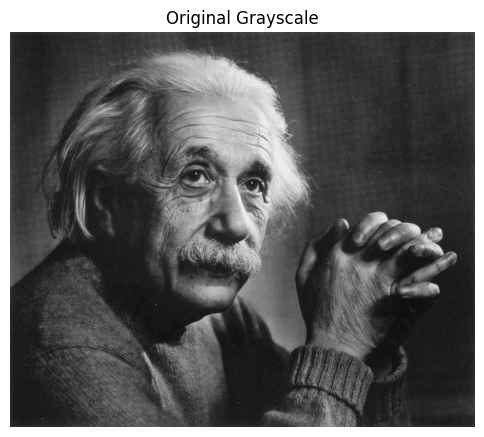

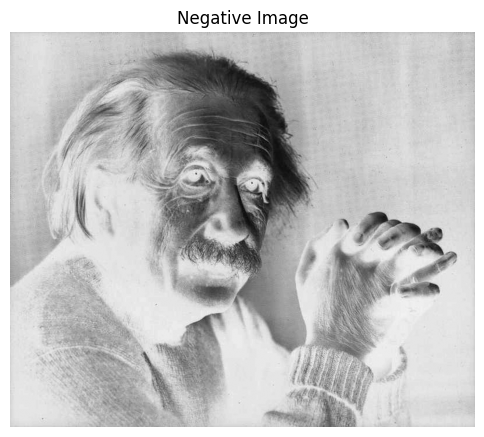

Pixel (305,210) - Original: 99, Negative: 156
Pixel (370,213) - Original: 98, Negative: 157
Pixel (521,167) - Original: 116, Negative: 139
Pixel (585,278) - Original: 105, Negative: 150
Pixel (215,650) - Original: 99, Negative: 156


In [4]:
# Step 1: Read grayscale
img2 = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)
show_image(img2, 'Original Grayscale')

# Step 2: Negative
img2_neg = 255 - img2
show_image(img2_neg, 'Negative Image')

# Step 4: Pixel value comparison
h, w = img2.shape
for _ in range(5):
    y, x = random.randint(0, h-1), random.randint(0, w-1)
    orig = img2[y, x]
    neg = img2_neg[y, x]
    print(f"Pixel ({y},{x}) - Original: {orig}, Negative: {neg}")


##  Problem 3 – `pout.tif`

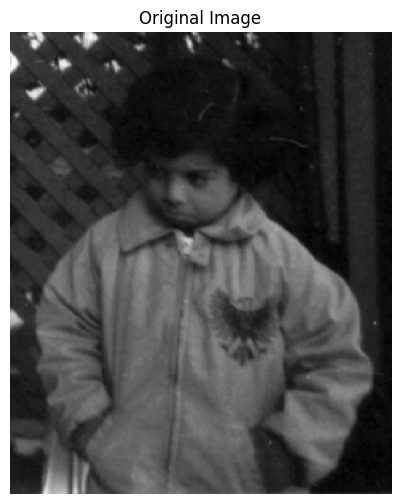

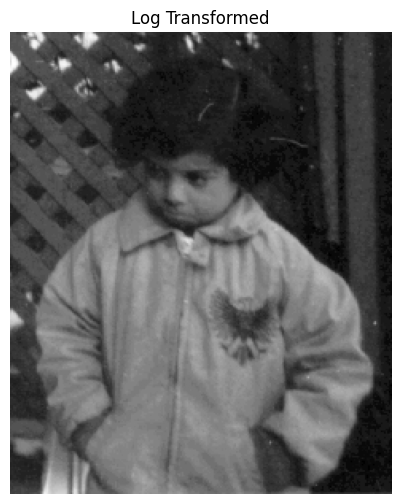

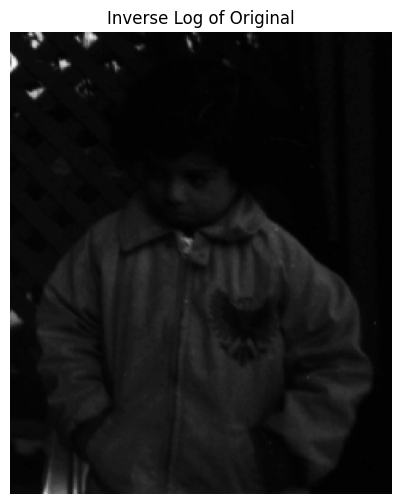

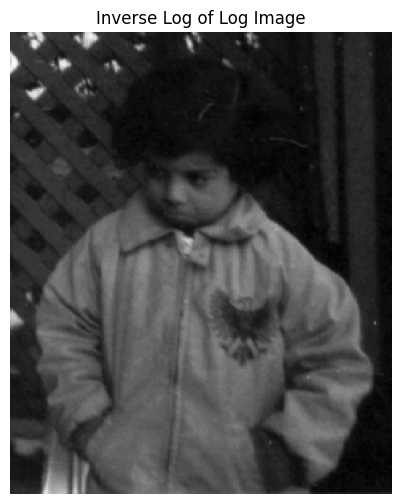

Comment: The inverse log of the log image approximates the original image, but minor differences may occur due to rounding.


In [5]:
# Step 1: Read grayscale
img3 = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
show_image(img3, 'Original Image')

# Step 2: Log transform
c = 255 / np.log(1 + np.max(img3))
log_img = c * np.log(1 + img3.astype(np.float32))
log_img = np.uint8(np.clip(log_img, 0, 255))
show_image(log_img, 'Log Transformed')

# Step 3: Inverse log transform of original
inv_log_orig = np.exp(img3 / c) - 1
inv_log_orig = np.uint8(np.clip(inv_log_orig, 0, 255))
show_image(inv_log_orig, 'Inverse Log of Original')

# Step 4: Inverse log of log image
inv_log_back = np.exp(log_img / c) - 1
inv_log_back = np.uint8(np.clip(inv_log_back, 0, 255))
show_image(inv_log_back, 'Inverse Log of Log Image')

# Step 5: Comments
print("Comment: The inverse log of the log image approximates the original image, but minor differences may occur due to rounding.")


##  Problem 4 – `moon.tif`

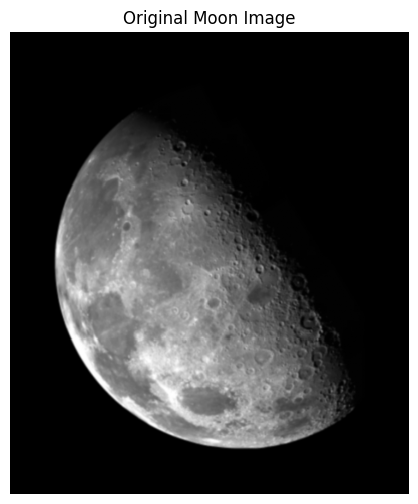

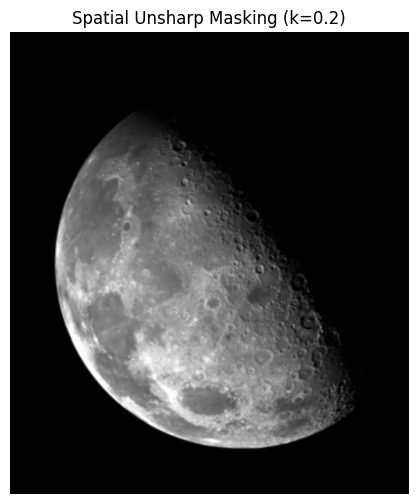

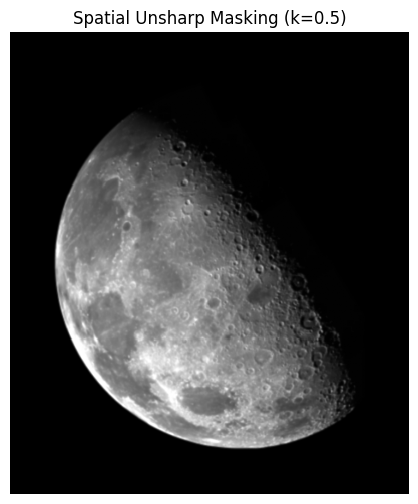

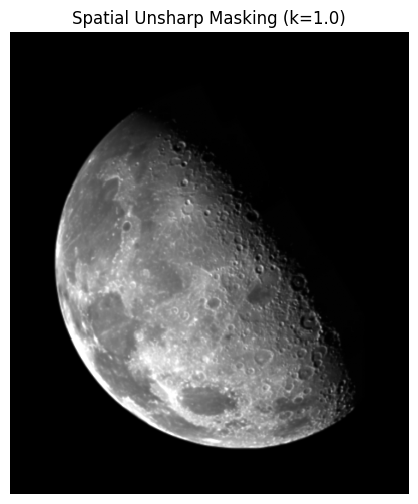

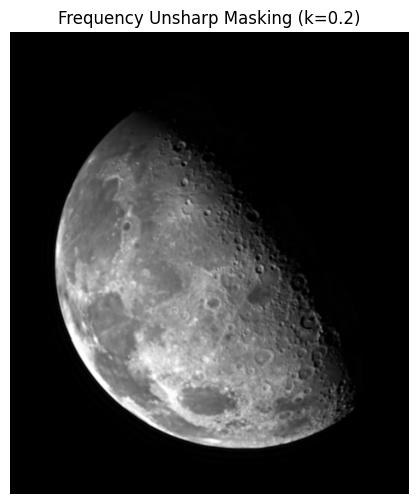

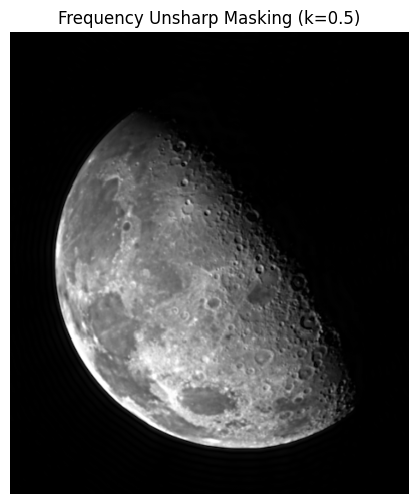

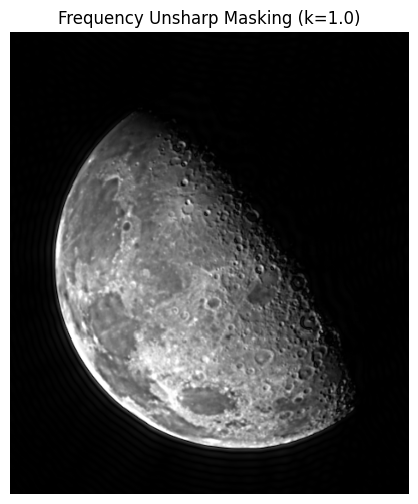

In [6]:
img4 = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
show_image(img4, 'Original Moon Image')

def unsharp_mask_spatial(img, k):
    blur = cv2.GaussianBlur(img, (9,9), 0)
    mask = cv2.subtract(img, blur)
    sharp = cv2.addWeighted(img, 1, mask, k, 0)
    return sharp

for k in [0.2, 0.5, 1.0]:
    result = unsharp_mask_spatial(img4, k)
    show_image(result, f"Spatial Unsharp Masking (k={k})")

def high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows//2 , cols//2
    H = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow)**2 + (v - ccol)**2)
            if D > D0:
                H[u,v] = 1
    return H

def unsharp_mask_freq(img, k, D0):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    H = high_pass_filter(img.shape, D0)
    result_shift = (1 + k * H) * dft_shift
    img_back = np.fft.ifft2(np.fft.ifftshift(result_shift))
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))
    return img_back

for k in [0.2, 0.5, 1.0]:
    result = unsharp_mask_freq(img4, k, 30)
    show_image(result, f"Frequency Unsharp Masking (k={k})")


##  Problem 5 – `pcb.tif`

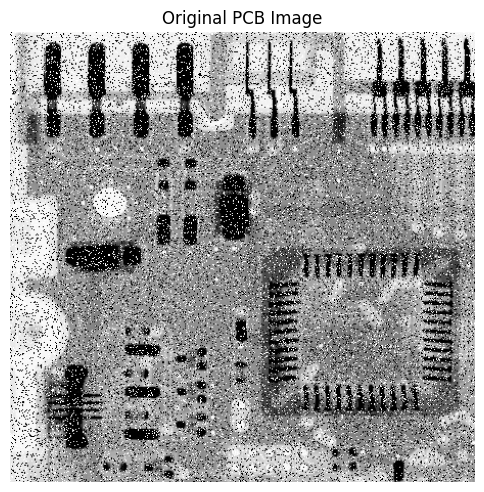

/var/folders/kf/ypr8j4s948z40xq_4nn401_r0000gn/T/ipykernel_55165/1932768908.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img5.ravel(), 256, [0,256])


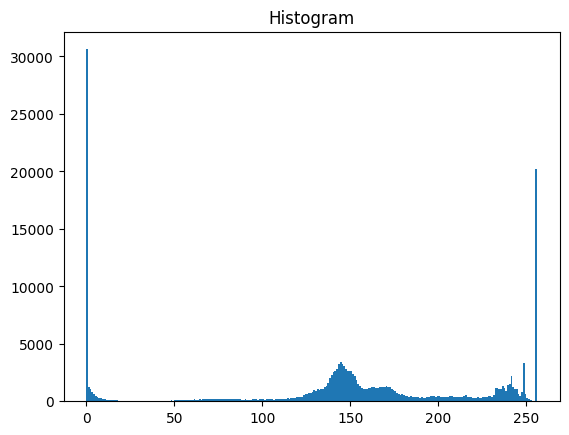

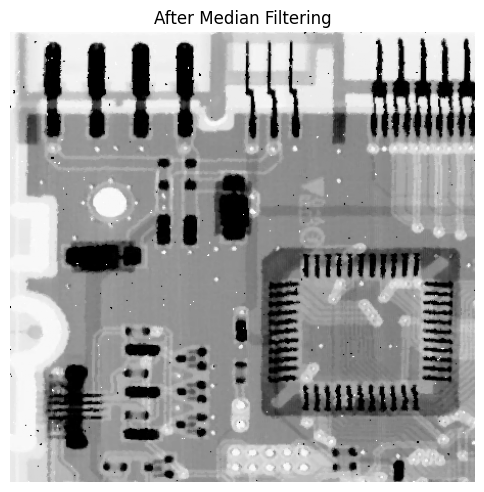

In [7]:
img5 = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)
show_image(img5, 'Original PCB Image')

# Histogram
plt.hist(img5.ravel(), 256, [0,256])
plt.title('Histogram')
plt.show()

# Assumed salt-and-pepper noise
median = cv2.medianBlur(img5, 3)
show_image(median, 'After Median Filtering')


##  Problem 6 – `pollen.tif`

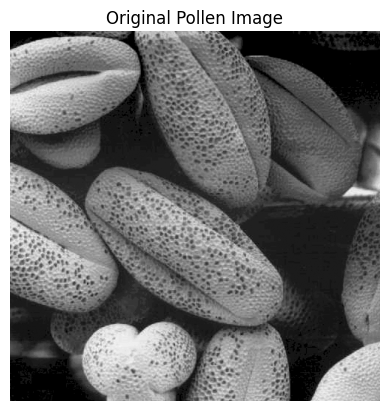

/var/folders/kf/ypr8j4s948z40xq_4nn401_r0000gn/T/ipykernel_55165/90496433.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img6.ravel(), 256, [0, 256])


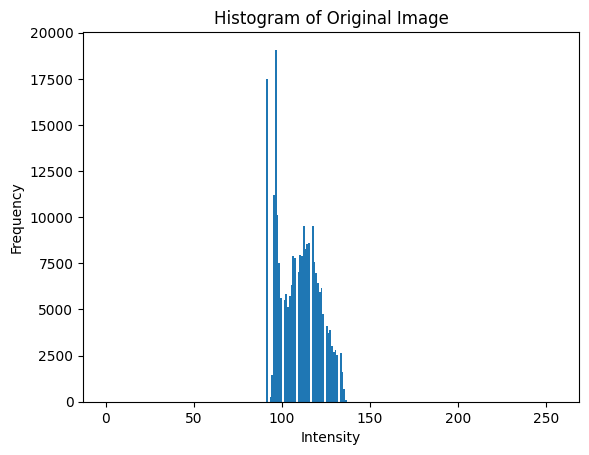

Comment: The image appears to have low contrast and possibly some blur or underexposure.


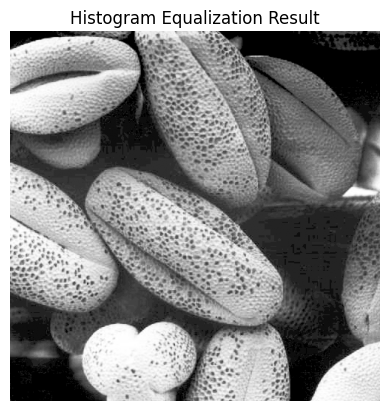

/var/folders/kf/ypr8j4s948z40xq_4nn401_r0000gn/T/ipykernel_55165/90496433.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalized.ravel(), 256, [0, 256])


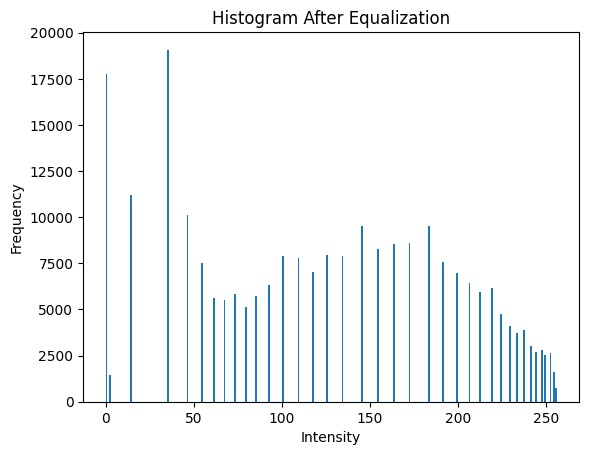

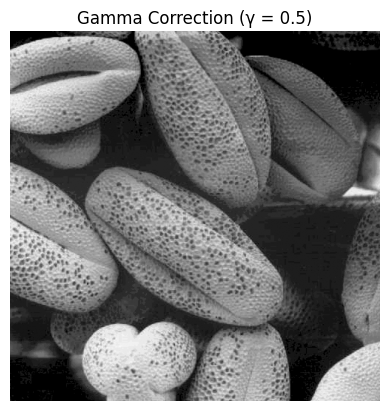

/var/folders/kf/ypr8j4s948z40xq_4nn401_r0000gn/T/ipykernel_55165/90496433.py:43: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gamma_corrected.ravel(), 256, [0, 256])


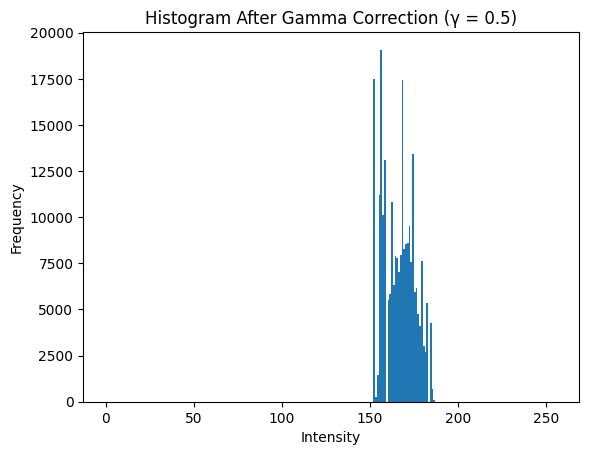

First method (equalization) redistributes intensities globally.
Second method (gamma correction) enhances dark regions more softly.


In [9]:
img6 = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img6, cmap='gray')
plt.title('Original Pollen Image')
plt.axis('off')
plt.show()

# Histogram of the image without applying techniques
plt.hist(img6.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

print("Comment: The image appears to have low contrast and possibly some blur or underexposure.")

# --- First Approach: Histogram Equalization ---
equalized = cv2.equalizeHist(img6)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalization Result')
plt.axis('off')
plt.show()


plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Histogram After Equalization')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

# --- Second Approach: Gamma Correction ---
# Normalize image to range 0-1, apply gamma, then rescale to 0-255
gamma = 0.5  # gamma < 1 enhances dark areas
normalized = img6 / 255.0
gamma_corrected = np.power(normalized, gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Correction (γ = {gamma})')
plt.axis('off')
plt.show()


plt.hist(gamma_corrected.ravel(), 256, [0, 256])
plt.title(f'Histogram After Gamma Correction (γ = {gamma})')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()


print("First method (equalization) redistributes intensities globally.")
print("Second method (gamma correction) enhances dark regions more softly.")

##  Conclusion

This project applied a variety of image processing techniques including image transformation, enhancement in both spatial and frequency domains, noise reduction, and contrast improvement.  
Each task reinforced the use of powerful tools of OpenCV and improved my understanding of digital image processing.
